In [ ]:
import sys
!{sys.executable} -m pip install os
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras

#THESE ARE THE IMPORTS USED, MUST BE INSTALLED. Try running this cell and if not, manually install them
#import os
#os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
#import pandas as pd
#from matplotlib import pyplot
#import numpy as np
#from sklearn import model_selection, metrics
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import LabelEncoder
#import tensorflow as tf
#from tensorflow import keras
#from keras import callbacks
#from keras.models import Sequential
#from keras.layers import LSTM, Dense, Flatten
#from keras.metrics import top_k_categorical_accuracy as keras_top_k

In [ ]:
#running the model
%run PythonFiles/LSTMAlgo.py

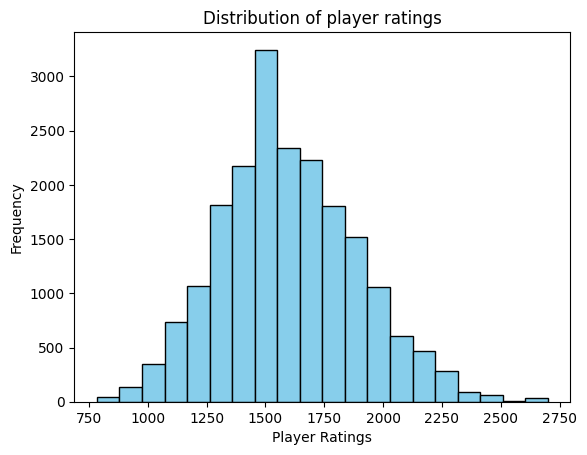

In [54]:
#Create a histogram for distribution of player ratings
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/games.csv')

player_ratings = df['white_rating']

plt.show()
plt.hist(player_ratings, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Player Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of player ratings')
plt.show()

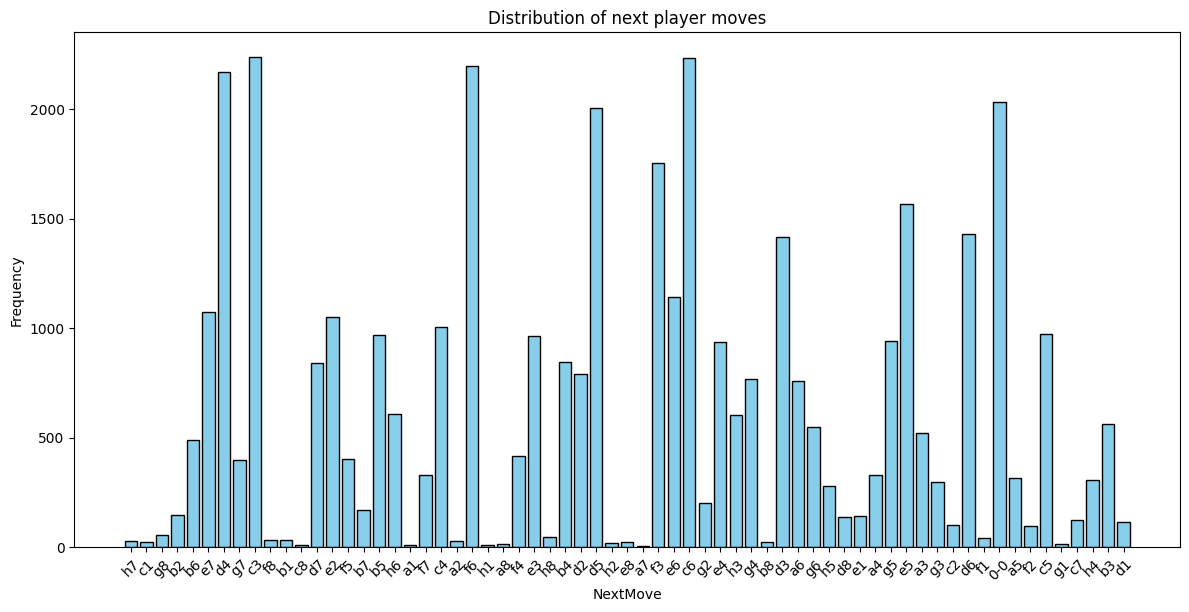

In [57]:
#creating histogram for distribution of next move
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('CSV/games.csv')

columns_used = ['winner', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves']
df_used = df[columns_used].copy().reset_index(drop=True)

dup_rows = df_used.copy()
df_used['player'] = df_used['white_id'].fillna(df_used['black_id'])

df_used.groupby('player')

snip_length = 11
df_used['moves'] = df_used['moves'].apply(lambda x: x.split())

df_used['Sequence'] = df_used['moves'].apply(lambda x: ' '.join(x))
df_used['SnippedSequence'] = df_used['Sequence'].apply(lambda x: ' '.join(x.split()[:snip_length]))

df_used.loc[:, ['NextMove']] = ""
unique_moves = []
for index, row in df_used.iterrows():
    arr = row['SnippedSequence']
    row['NextMove'] = arr.rpartition(' ')[-1]
    df_used.loc[index, 'NextMove'] = row['NextMove']
    if df_used.loc[index, 'NextMove'] not in unique_moves:
        unique_moves.append(df_used.loc[index, 'NextMove'])
df_used.dropna(subset=['NextMove'], inplace=True)
df_used['SnippedSequence'] = df_used['Sequence'].apply(lambda x: ' '.join(x.split()[:(snip_length-1)]))

dup_rows['winner'] = df_used['winner'].map({'white': 'black', 'black': 'white'})
dup_rows['white_id'], dup_rows['black_id'] = df_used['black_id'], df_used['white_id']
dup_rows['white_rating'], dup_rows['black_rating'] = df_used['black_rating'], df_used['white_rating']

dup_rows['player'] = dup_rows['white_id'].fillna(dup_rows['black_id'])
dup_rows.groupby('player')

snip_length = 10
dup_rows['moves'] = dup_rows['moves'].apply(lambda x: x.split())

dup_rows['Sequence'] = dup_rows['moves'].apply(lambda x: ' '.join(x))
dup_rows['SnippedSequence'] = dup_rows['Sequence'].apply(lambda x: ' '.join(x.split()[:snip_length]))
dup_rows.loc[:, ['NextMove']] = ""
unique_moves = []
for index, row in dup_rows.iterrows():
    arr = row['SnippedSequence']
    row['NextMove'] = arr.rpartition(' ')[-1]
    dup_rows.loc[index, 'NextMove'] = row['NextMove']
    if dup_rows.loc[index, 'NextMove'] not in unique_moves:
        unique_moves.append(dup_rows.loc[index, 'NextMove'])
dup_rows.dropna(subset=['NextMove'], inplace=True)
dup_rows['SnippedSequence'] = dup_rows['Sequence'].apply(lambda x: ' '.join(x.split()[:(snip_length-1)]))

df_final = pd.concat([df_used, dup_rows], ignore_index=True)

player_ratings = df_final['NextMove']

destination_squares = [re.search(r'[a-h][1-8]', move).group() if re.search(r'[a-h][1-8]', move) else '0-0' for move in df_final['NextMove']]

counts = {square: destination_squares.count(square) for square in set(destination_squares)}

plt.figure(figsize=(12,6))
plt.bar(counts.keys(), counts.values(), color='skyblue', edgecolor='black')

plt.xlabel('NextMove')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.title('Distribution of next player moves')
plt.show()

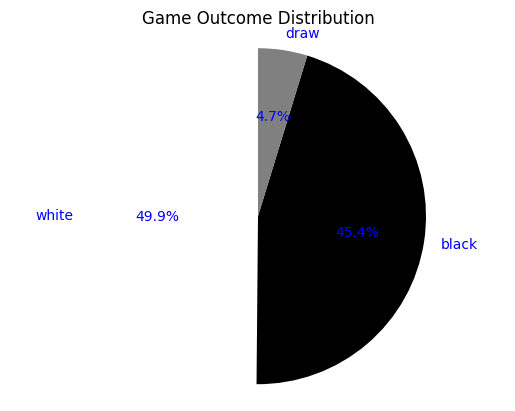

In [58]:
#creating pie chart for how many times white or black win (or draw)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/games.csv')

outcome_counts = df['winner'].value_counts()

plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['white', 'black', 'gray'], textprops={'color': 'blue'})
plt.axis('equal') 
plt.title('Game Outcome Distribution')
plt.show()